In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [2]:
df=pd.DataFrame(calidata,columns=calihouses.feature_names)

In [44]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.232720,41.0,2.077455,0.704982,5.777652,1.268511,37.88,-122.23
1,2.230165,21.0,1.979364,0.678988,7.784057,1.134572,37.86,-122.22
2,2.111110,52.0,2.228738,0.729212,6.208590,1.335596,37.85,-122.24
3,1.893579,52.0,1.919471,0.729025,6.326149,1.266369,37.85,-122.25
4,1.578195,52.0,1.985385,0.732888,6.338594,1.157342,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.940124,25.0,1.799307,0.757686,6.740519,1.269931,39.48,-121.09
20636,1.268861,18.0,1.962070,0.839751,5.877736,1.416534,39.49,-121.21
20637,0.993252,17.0,1.825443,0.751460,6.915723,1.201661,39.43,-121.22
20638,1.053336,18.0,1.845223,0.775611,6.609349,1.138861,39.43,-121.32


In [45]:
calihouses.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [46]:
calihouses.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [47]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [48]:
df.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      1.390761
AveBedrms     8.988786
Population   -1.044087
AveOccup      3.879679
Latitude      0.465953
Longitude    -0.297801
dtype: float64

In [49]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [50]:
df.skew()

MedInc        0.226083
HouseAge      0.060331
AveRooms      0.335100
AveBedrms     6.436582
Population   -1.044087
AveOccup      0.960154
Latitude      0.465953
Longitude    -0.297801
dtype: float64

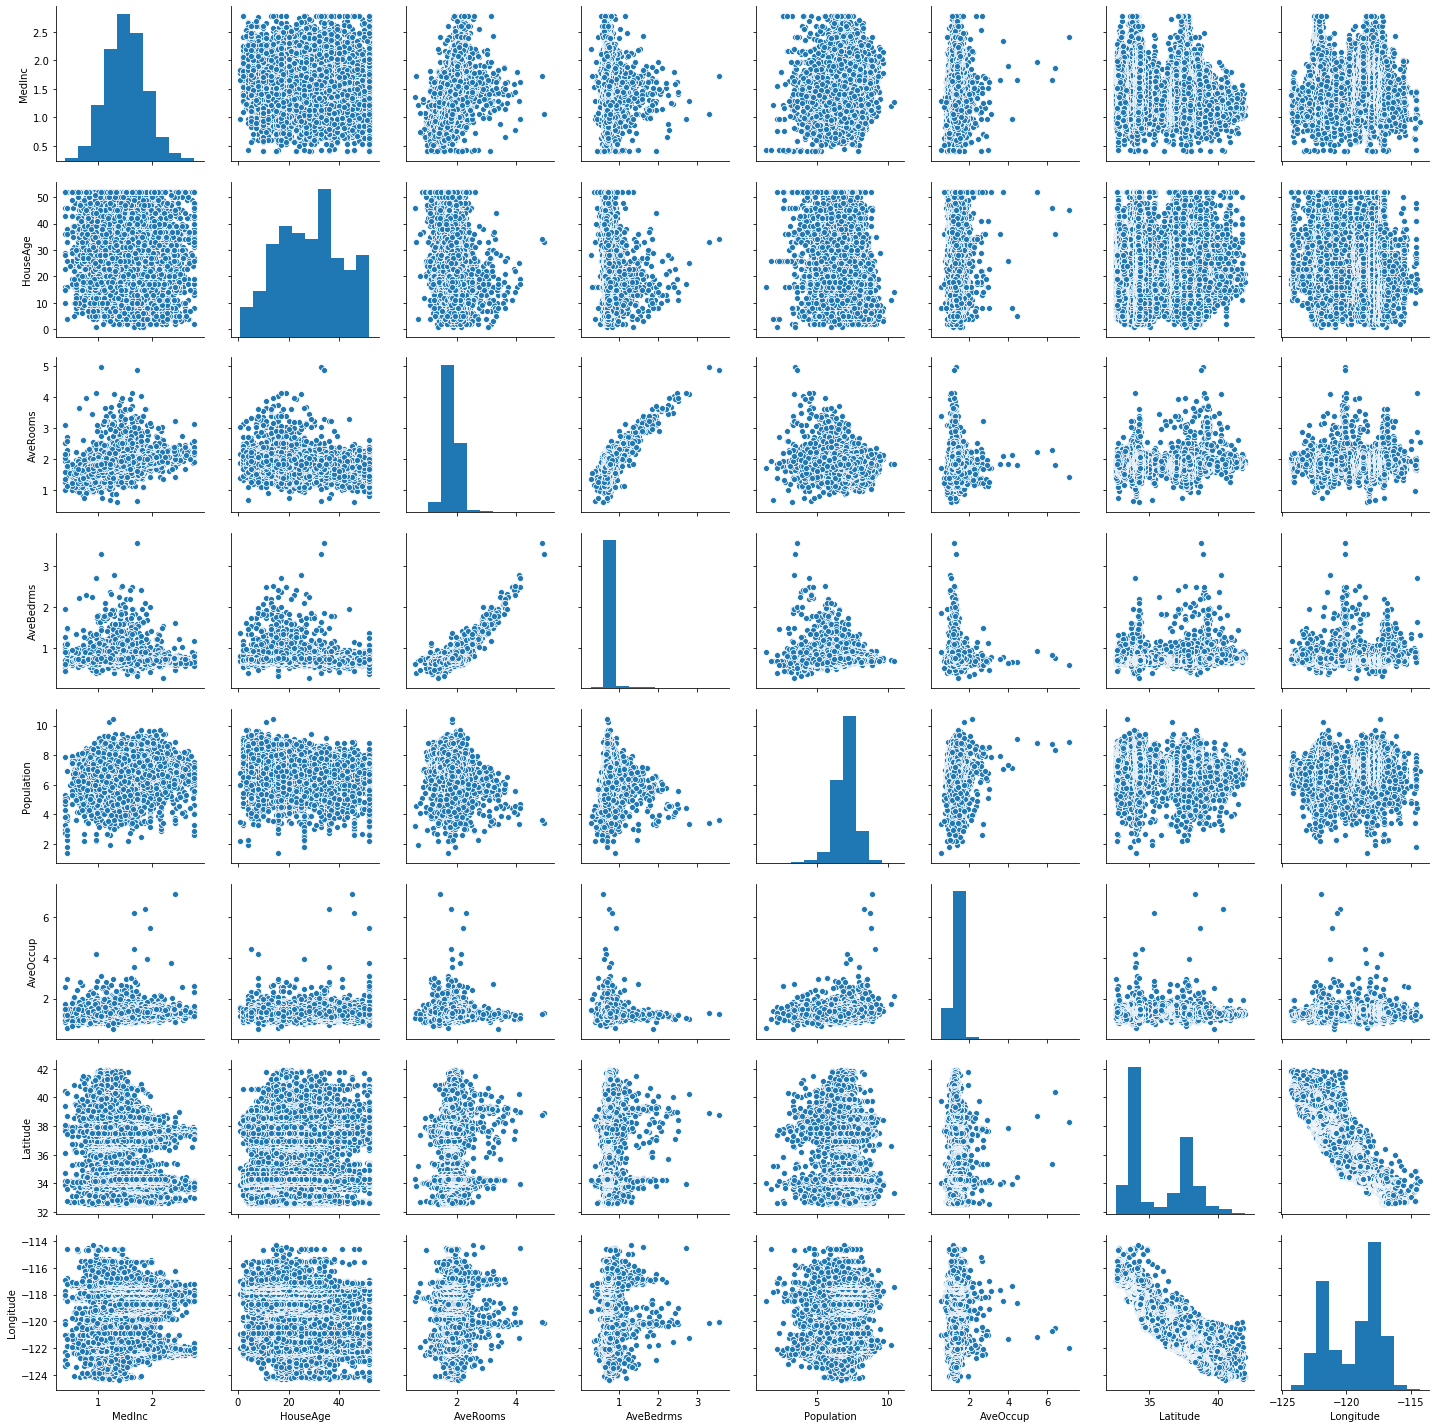

In [10]:
sns.pairplot(df)

In [51]:
from scipy.stats import zscore

In [52]:
df.shape

(20640, 8)

In [53]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.232720,41.0,1.124103,0.533554,5.777652,0.819124,37.88,-122.23
1,2.230165,21.0,1.091710,0.518191,7.784057,0.758266,37.86,-122.22
2,2.111110,52.0,1.172091,0.547666,6.208590,0.848267,37.85,-122.24
3,1.893579,52.0,1.071402,0.547558,6.326149,0.818179,37.85,-122.25
4,1.578195,52.0,1.093729,0.549789,6.338594,0.768877,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,0.940124,25.0,1.029372,0.563998,6.740519,0.819749,39.48,-121.09
20636,1.268861,18.0,1.085888,0.609630,5.877736,0.882334,39.49,-121.21
20637,0.993252,17.0,1.038665,0.560450,6.915723,0.789212,39.43,-121.22
20638,1.053336,18.0,1.045642,0.574145,6.609349,0.760273,39.43,-121.32


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
sc=StandardScaler()
df_new=sc.fit_transform(df)

In [56]:
df_new

array([[ 1.99550539,  0.98214266,  1.09545387, ..., -0.39454913,
         1.05254828, -1.32783522],
       [ 1.98838047, -0.60701891,  0.68993799, ..., -1.1336413 ,
         1.04318455, -1.32284391],
       [ 1.65644419,  1.85618152,  1.69619483, ..., -0.04061781,
         1.03850269, -1.33282653],
       ...,
       [-1.46024238, -0.92485123,  0.02589734, ..., -0.75781683,
         1.77823747, -0.8237132 ],
       [-1.29272242, -0.84539315,  0.11323178, ..., -1.10926257,
         1.77823747, -0.87362627],
       [-0.82688611, -1.00430931,  0.06081967, ..., -0.30319574,
         1.75014627, -0.83369581]])

In [57]:
df_new.shape

(20640, 8)

In [58]:
df_new.reshape(-1,1)

array([[ 1.99550539],
       [ 0.98214266],
       [ 1.09545387],
       ...,
       [-0.30319574],
       [ 1.75014627],
       [-0.83369581]])

In [59]:
df_new.shape

(20640, 8)

In [60]:
y=calihouses.target
y.shape

(20640,)

In [61]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [62]:
y.reshape(-1,1)

array([[4.526],
       [3.585],
       [3.521],
       ...,
       [0.923],
       [0.847],
       [0.894]])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(df_new,y,random_state=42,test_size=0.25)

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.6375158866251452

In [67]:
x_train.reshape(-1,1)
x_test.reshape(-1,1)
y_train.reshape(-1,1)
y_test.reshape(-1,1)

array([[0.477  ],
       [0.458  ],
       [5.00001],
       ...,
       [1.177  ],
       [2.631  ],
       [4.815  ]])

In [68]:
y_pred=lr.predict(x_test)

In [69]:
y_pred

array([0.19837452, 1.8454974 , 3.56636083, ..., 1.30411672, 2.35838879,
       3.59092506])

In [70]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [71]:
mse=mean_squared_error(y_test,y_pred)
mse

0.48774803588687166

In [72]:
from math import sqrt
sqrt(mse)

0.6983896017889095

In [73]:
r2=r2_score(y_test,y_pred)
r2

0.631392561758443

In [74]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train, x_test,y_train,y_test=train_test_split(df_new,y,random_state=r_state,test_size=.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to ',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print('max r2_score corresponding to',final_r_state,'is',max_r_score)
    return final_r_state
    

In [75]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
maxr2_score(knr,df_new,y)


r2 score corresponding to  42 is 0.7253725246507055
r2 score corresponding to  43 is 0.7299229647570213
r2 score corresponding to  44 is 0.7383641898596578
r2 score corresponding to  45 is 0.7308528729644903
r2 score corresponding to  46 is 0.736097956577537
r2 score corresponding to  47 is 0.7327972890345009
r2 score corresponding to  48 is 0.7262740525142161
r2 score corresponding to  49 is 0.7289680463984445
r2 score corresponding to  50 is 0.7172641512956337
r2 score corresponding to  51 is 0.7277817199769718
r2 score corresponding to  52 is 0.7178868446747082
r2 score corresponding to  53 is 0.712945408322506
r2 score corresponding to  54 is 0.7175827837439175
r2 score corresponding to  55 is 0.7210237224796752
r2 score corresponding to  56 is 0.7160167284526515
r2 score corresponding to  57 is 0.7342558613530277
r2 score corresponding to  58 is 0.7303018820466258
r2 score corresponding to  59 is 0.7402264492915063
r2 score corresponding to  60 is 0.736673731923511
r2 score corres

86

In [86]:
from sklearn.model_selection import cross_val_score
cross_val_score(knr,df_new,y,cv=5,scoring='r2').mean()

0.5962815502447532

In [76]:
maxr2_score(lr,df_new,y)

r2 score corresponding to  42 is 0.6207705270861854
r2 score corresponding to  43 is 0.646043142798493
r2 score corresponding to  44 is 0.648685392900507
r2 score corresponding to  45 is 0.6363960246280668
r2 score corresponding to  46 is 0.6381612406544963
r2 score corresponding to  47 is 0.6428952900028739
r2 score corresponding to  48 is 0.6448346060171768
r2 score corresponding to  49 is 0.6207751075701848
r2 score corresponding to  50 is 0.6236023548399227
r2 score corresponding to  51 is 0.6430130899618797
r2 score corresponding to  52 is 0.6409258124516966
r2 score corresponding to  53 is 0.628591700114456
r2 score corresponding to  54 is 0.6266917127878651
r2 score corresponding to  55 is 0.6312425284013641
r2 score corresponding to  56 is 0.6171270542444066
r2 score corresponding to  57 is 0.6409854267446367
r2 score corresponding to  58 is 0.6405206953018657
r2 score corresponding to  59 is 0.6483028446280255
r2 score corresponding to  60 is 0.6435443860783052
r2 score corres

86

In [88]:
cross_val_score(lr,df_new,y,cv=5,scoring='r2').mean()

0.5846653567991674

In [77]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
maxr2_score(dt,df_new,y)

r2 score corresponding to  42 is 0.6270452389338959
r2 score corresponding to  43 is 0.6199435866060248
r2 score corresponding to  44 is 0.6494281413445903
r2 score corresponding to  45 is 0.5952125151446919
r2 score corresponding to  46 is 0.6140856469960643
r2 score corresponding to  47 is 0.6258626846420252
r2 score corresponding to  48 is 0.6006445919680158
r2 score corresponding to  49 is 0.6145052952039485
r2 score corresponding to  50 is 0.5772405631304567
r2 score corresponding to  51 is 0.5822903536202385
r2 score corresponding to  52 is 0.6110234575462135
r2 score corresponding to  53 is 0.5992482936312755
r2 score corresponding to  54 is 0.6368975795940581
r2 score corresponding to  55 is 0.6034209054194828
r2 score corresponding to  56 is 0.6145211689975105
r2 score corresponding to  57 is 0.6611971699353092
r2 score corresponding to  58 is 0.5955730699855182
r2 score corresponding to  59 is 0.5946040156195158
r2 score corresponding to  60 is 0.6072495805876985
r2 score cor

57

In [89]:
cross_val_score(dt,df_new,y,cv=5,scoring='r2').mean()

0.3436700145595002

In [83]:
from sklearn.svm import SVR
svc=SVR()
maxr2_score(svc,df_new,y)
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  42 is 0.768981405589217


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  43 is 0.7794457564443007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  44 is 0.7908269139100068


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  45 is 0.7805816768231141


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  46 is 0.7773586898785022


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  47 is 0.7682934224184342


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  48 is 0.7784896709573906


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  49 is 0.7750432998272396


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  50 is 0.7675923571055793


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  51 is 0.7769335102900476


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  52 is 0.7724284154892246


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  53 is 0.7627718824050732


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  54 is 0.7716761130520912


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  55 is 0.762419156105451


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  56 is 0.7656602795798781


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  57 is 0.7738306181871409


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  58 is 0.7755386781241719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  59 is 0.7865621072820798


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  60 is 0.7763503793801599


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  61 is 0.7802682070422885


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  62 is 0.7808435941087246


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  63 is 0.7751577222307551


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  64 is 0.78081880906981


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  65 is 0.7774775540160459


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  66 is 0.7839246817957477


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  67 is 0.7575484519796382


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  68 is 0.7731074887965028


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  69 is 0.7731097216572367


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  70 is 0.7827902015206201


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  71 is 0.7671515005604745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  72 is 0.7809314240343572


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  73 is 0.777083025558664


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  74 is 0.782705188126513


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  75 is 0.7673809173243421


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  76 is 0.7811400013456719


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  77 is 0.7652417827564901


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  78 is 0.7783623213158152


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  79 is 0.763015462691411


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  80 is 0.7592035881889057


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  81 is 0.7829599120313789


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  82 is 0.7761361039382386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  83 is 0.7754663983371141


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  84 is 0.784649776203335


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  85 is 0.7679106105696936


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  86 is 0.781926170718112


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  87 is 0.7778181422043733


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  88 is 0.7590891930053596


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  89 is 0.7859367767468575


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  90 is 0.7842572100593878


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  91 is 0.7598229995633581


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  92 is 0.7749671521941494


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  93 is 0.7908005778267071


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  94 is 0.7864175154621974


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  95 is 0.7806577745537875


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  96 is 0.7771257357945588


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  97 is 0.7603919687909165


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  98 is 0.7758447133535524


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


r2 score corresponding to  99 is 0.774750850837077
max r2_score corresponding to 44 is 0.7908269139100068


In [92]:
cross_val_score(svc,df_new,y,cv=5,scoring='r2').mean()

0.6978197077668689

In [94]:
x_train,x_test,y_train,y_test=train_test_split(df_new,y,random_state=44,test_size=.20)
svc=SVR()
svc.fit(x_train,y_train)
svc.pred=svc.predict(x_test)


In [98]:
print('MSE is:',mean_squared_error(y_test,svc.pred))
print('RMSE is:',np.sqrt(mean_squared_error(y_test,svc.pred)))
print('R2 score is:',r2_score(y_test,svc.pred))

MSE is: 0.28568506331293647
RMSE is: 0.5344951480723997
R2 score is: 0.7908269139100068


In [99]:
from sklearn.externals import joblib
joblib.dump(svc,'Project_13_svr(Cali_Houses).pkl')

['Project_13_svr(Cali_Houses).pkl']